 # TensorFlow Tutorial #01

## TensorFlow Graph

The entire purpose of TensorFlow is to have a so-called computational graph that can be executed much more efficiently than if the same calculations were to be performed directly in Python. TensorFlow can be more efficient than NumPy because TensorFlow knows the entire computation graph that must be executed, while NumPy only knows the computation of a single mathematical operation at a time.

TensorFlow can also automatically calculate the gradients that are needed to optimize the variables of the graph so as to make the model perform better. This is because the graph is a combination of simple mathematical expressions so the gradient of the entire graph can be calculated using the chain-rule for derivatives.

TensorFlow can also take advantage of multi-core CPUs as well as GPUs - and Google has even built special chips just for TensorFlow which are called TPUs (Tensor Processing Units) that are even faster than GPUs.

A TensorFlow graph consists of the following parts which will be detailed below:

- Placeholder variables used to feed input into the graph.
- Model variables that are going to be optimized so as to make the model perform better.
- The model which is essentially just a mathematical function that calculates some output given the input in the placeholder variables and the model variables.
- A cost measure that can be used to guide the optimization of the variables.
- An optimization method which updates the variables of the model.

In addition, the TensorFlow graph may also contain various debugging statements e.g. for logging data to be displayed using TensorBoard, which is not covered in this tutorial.

## Simple Linear Model

### Introduction

This tutorial demonstrates the basic workflow of using TensorFlow with a simple linear model. After loading the so-called fashion MNIST data-set with images of hfashion images, we define and optimize a simple mathematical model in TensorFlow. The results are then plotted and discussed.

You show be familiar with basic linear alegbra, Python and the Juypter Notebook. It also helps if you have understanding of ML and classification. 

#### Imports

In [35]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



1.11.0


#### Load Data

The MNIST data-set is about 12 MB and will be downloaded automatically if it is not located in the given path.

In [37]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Loading the dataset returns four NumPy arrays:

- The train_images and train_labels arrays are the training set—the data the model uses to learn.
- The model is tested against the test set, the test_images, and test_labels arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. 

These correspond to the class of clothing the image represents:

In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [39]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:



In [40]:
len(train_labels)

60000

Each label is an integer between 0 and 9:



In [41]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [42]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [43]:
len(test_labels)

10000

#### Preprocessing the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

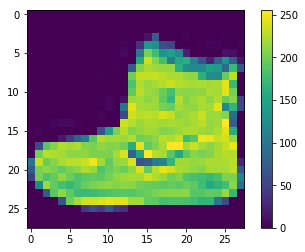

In [44]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

In [45]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.



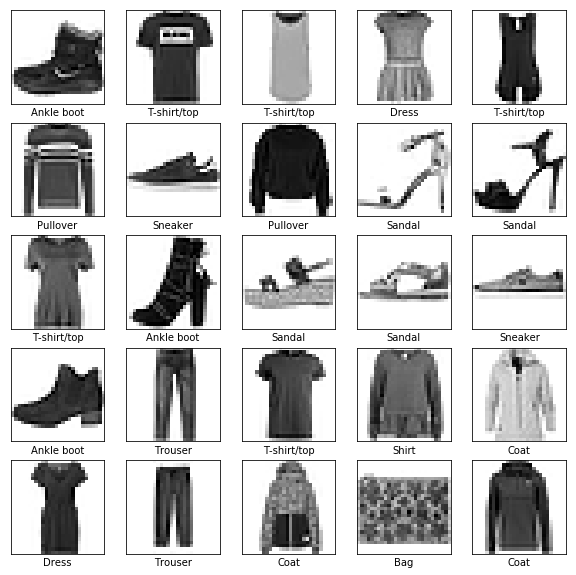

In [46]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

### Build  the model

Building the neural network requires configuring the layers of the model, then compiling the model. 

#### Setup the layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand. 

Most of the deep learning consists of chaining together simple layers. Most layers, like  tf.keras.layers.Dense, have parameters that are learned during training.

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a format of 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the images and lining them up. This layer has no parameters to learn, it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model 

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function - This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
- Optimizer - This is how the model is updated based on the data it sees and its loss function.
- Metrics - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified. 


In [49]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model - in this example, the train_images and train_labels arrays. 
2. The model learns to associate images and labels. 
3. We ask the model to make predictions about a test set - in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method—the model is "fit" to the training data:



In [50]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.5017 - acc: 0.8236
Epoch 2/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.3776 - acc: 0.8641
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.3389 - acc: 0.8763
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.3139 - acc: 0.8841
Epoch 5/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2963 - acc: 0.8908
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2811 - acc: 0.8951
Epoch 7/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2670 - acc: 0.9015
Epoch 8/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2568 - acc: 0.9054
Epoch 9/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2488 - acc: 0.9076
Epoch 10/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2392 - acc: 0.9110

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [51]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test accuracy:", test_acc)

10000/10000 [==============================] - 0s 43us/step
Test accuracy: 0.8848


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

### Make Predictions

With the model trained, we can use it to make predictions about some images. 

In [52]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [54]:
predictions[0]

array([4.2930077e-09, 6.3566669e-10, 4.1939879e-11, 3.0021557e-10,
       1.8972979e-09, 1.4941931e-04, 3.0015376e-10, 1.9492017e-03,
       8.3970813e-09, 9.9790132e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [56]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct:

In [57]:
test_labels[0]

9

We can graph this to look at the full set of 10 channels



In [61]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


Let's look at the 0th image, predictions, and prediction array.



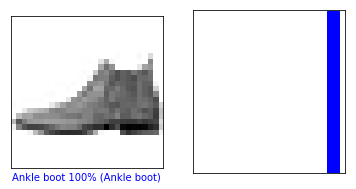

In [62]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

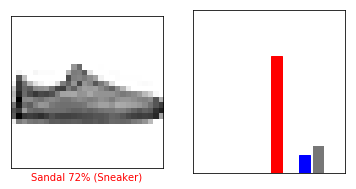

In [63]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

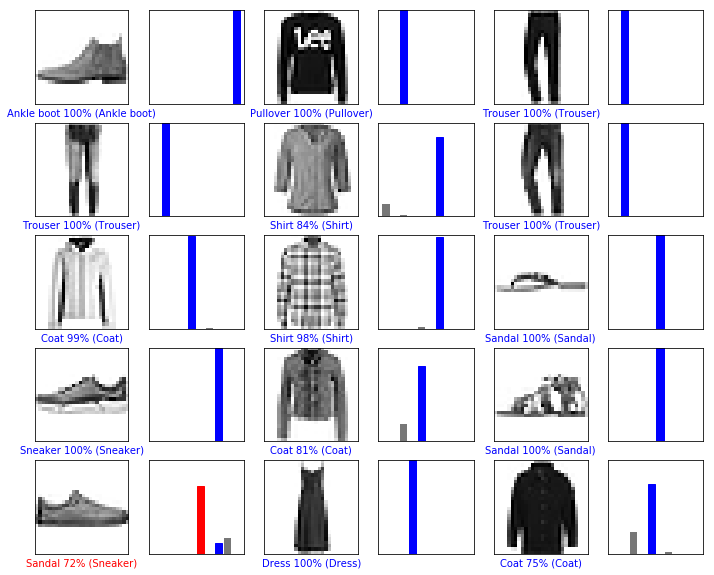

In [64]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


Finally, use the trained model to make a prediction about a single image.

In [67]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [68]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the image:

In [69]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.2930162e-09 6.3566546e-10 4.1939879e-11 3.0021616e-10 1.8972979e-09
  1.4941931e-04 3.0015376e-10 1.9492017e-03 8.3970813e-09 9.9790132e-01]]


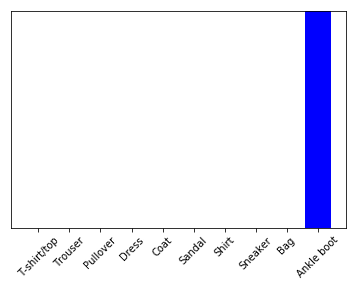

In [70]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [71]:
np.argmax(predictions_single[0])

9

And, as before, the model predicts a label of 9.